<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #AABCBB> <font size = 4>I.F. Karen Violeta García Hernandez - if707178@iteso.mx </font>

<center><font color=#50C8C4><font size=5> Laboratorio 1: Tading Manual </font> <br> <br>

<center> <font color= #004A94 > <font size = 4> Primavera 2020 </font>  |  <font color= #004A94> <font size = 4> Repositorio: <a href='https://github.com/violetarcia/LAB_0_KVGH.git'>Link</a></font>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Resumen </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> En este laboratorio se dedicará a hacer trading manual </p>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Código </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A continuación se desglosa el código con el cual se analizan varias divisa. Primero se empieza importando paqueterías y archivos que nos serán útiles</p>

In [1]:
import funciones as fn                              # Para procesamiento de datos
import pandas as pd                                 # Procesamiento de datos
import matplotlib.pyplot as plt                     # Visualizar graficas básicas
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.metrics import r2_score

In [2]:
# Lista de divisas que me gustaria analizar
instrument = ['EUR_USD', 'USD_JPY', 'EUR_JPY', 'AUD_USD', 'GBP_USD',
              'USD_CHF', 'AUD_JPY', 'CHF_HKD', 'EUR_AUD', 'GBP_SGD',
              'USD_CAD', 'EUR_CAD', 'CAD_CHF', 'SGD_HKD', 'AUD_CHF']
pd.set_option('display.max_rows', 8)



In [3]:
'''Función Divisa
         Obtener el precio de cierre de tal instrumento
         
         Sólo un parametro: el instrumento. (Ejem: 'EUR_USD')
        
        Para cambiar las fechas o temporalidad es necesario hacerlo desde la función
'''
def Divisa(ins):
    OA_Ak = '800f1b3f91d7cb0a713c532e17823f6d-f9acd6a21490f97aef649dfd8e723435'
    OA_Gn = "H4"                                                     # Granularidad
    fini = pd.to_datetime("2019-11-11 00:00:00").tz_localize('GMT')  # Fecha inicial
    ffin = pd.to_datetime("2020-02-09 00:00:00").tz_localize('GMT')  # Fecha final
    
    # Descargar precios masivos
    df = fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn, p3_inst=ins, p4_oatk=OA_Ak, p5_ginc=4900)
    close = df['Close']
    
    return close


In [4]:
# Utilizar la funcion para la lista de divisas de las cuales se requieren los precios de cierre
data = list(map(Divisa, instrument))

# Precios

In [5]:
# Se acomoda la lista en un solo DataFrame
closes = pd.concat(data, axis = 1)
closes.columns = instrument

In [6]:
# En el siguiente DF estan los precios de cierre (cada hora) de lo que va del año (2020)
closes

,EUR_USD,USD_JPY,EUR_JPY,AUD_USD,GBP_USD,USD_CHF,AUD_JPY,CHF_HKD,EUR_AUD,GBP_SGD,USD_CAD,EUR_CAD,CAD_CHF,SGD_HKD,AUD_CHF
0,1.10291,108.979,120.194,0.68616,1.28058,0.99641,74.778,7.85966,1.60734,1.74326,1.32245,1.45854,0.75344,5.75287,0.68369
1,1.10384,108.938,120.250,0.68538,1.28802,0.99384,74.664,7.87585,1.61055,1.75284,1.32280,1.46016,0.75132,5.75154,0.68116
2,1.10370,109.086,120.400,0.68491,1.28588,0.99416,74.714,7.87227,1.61144,1.74997,1.32226,1.45938,0.75183,5.75074,0.68090
3,1.10326,109.052,120.314,0.68517,1.28538,0.99334,74.718,7.87758,1.61022,1.74884,1.32252,1.45910,0.75112,5.75140,0.68061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1.09586,109.942,120.487,0.66982,1.29260,0.97594,73.643,7.95376,1.63599,1.79506,1.33083,1.45840,0.73334,5.58950,0.65370
387,1.09647,109.874,120.482,0.66847,1.29468,0.97626,73.450,7.95306,1.64026,1.80054,1.33142,1.45988,0.73324,5.58288,0.65260
388,1.09496,109.808,120.243,0.66782,1.29061,0.97778,73.334,7.94165,1.63958,1.79352,1.33045,1.45678,0.73494,5.58782,0.65298
389,1.09473,109.769,120.176,0.66774,1.28845,0.97751,73.299,7.94428,1.63943,1.79055,1.33020,1.45622,0.73488,5.58800,0.65272


In [7]:
# Calcular la matriz de coefecientes de correlacion
corr = closes.corr()

In [8]:
# Visualizarlo
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,EUR_USD,USD_JPY,EUR_JPY,AUD_USD,GBP_USD,USD_CHF,AUD_JPY,CHF_HKD,EUR_AUD,GBP_SGD,USD_CAD,EUR_CAD,CAD_CHF,SGD_HKD,AUD_CHF
EUR_USD,1,-0.061,0.71,0.83,0.64,-0.45,0.71,0.5,-0.52,0.12,-0.78,-0.14,0.13,0.62,0.31
USD_JPY,-0.061,1,0.66,0.068,-0.05,-0.25,0.46,0.17,-0.15,-0.13,-0.15,-0.3,-0.2,-0.11,-0.15
EUR_JPY,0.71,0.66,1,0.68,0.45,-0.52,0.86,0.49,-0.5,0.0018,-0.69,-0.31,-0.041,0.39,0.13
AUD_USD,0.83,0.068,0.68,1,0.37,-0.25,0.92,0.29,-0.91,-0.18,-0.76,-0.3,0.39,0.73,0.62
GBP_USD,0.64,-0.05,0.45,0.37,1,-0.45,0.31,0.46,-0.092,0.74,-0.47,-0.04,-0.16,0.25,-0.057
USD_CHF,-0.45,-0.25,-0.52,-0.25,-0.45,1,-0.32,-0.99,0.044,-0.15,0.68,0.58,0.71,0.014,0.61
AUD_JPY,0.71,0.46,0.86,0.92,0.31,-0.32,1,0.32,-0.87,-0.21,-0.74,-0.38,0.26,0.61,0.49
CHF_HKD,0.5,0.17,0.49,0.29,0.46,-0.99,0.32,1,-0.067,0.14,-0.68,-0.54,-0.69,0.071,-0.57
EUR_AUD,-0.52,-0.15,-0.5,-0.91,-0.092,0.044,-0.87,-0.067,1,0.37,0.58,0.35,-0.49,-0.66,-0.71
GBP_SGD,0.12,-0.13,0.0018,-0.18,0.74,-0.15,-0.21,0.14,0.37,1,0.12,0.33,-0.32,-0.38,-0.27


In [9]:
resume_clos = closes.describe()
resume_clos

,EUR_USD,USD_JPY,EUR_JPY,AUD_USD,GBP_USD,USD_CHF,AUD_JPY,CHF_HKD,EUR_AUD,GBP_SGD,USD_CAD,EUR_CAD,CAD_CHF,SGD_HKD,AUD_CHF
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,1.108296,109.157741,120.981251,0.684317,1.303752,0.979954,74.698941,7.956131,1.619680,1.770429,1.317123,1.459707,0.744014,5.741068,0.670580
std,0.005828,0.535740,0.847278,0.007454,0.012095,0.010560,0.915210,0.063057,0.011635,0.015639,0.009949,0.006964,0.005887,0.036493,0.008845
min,1.094730,107.866000,119.339000,0.667740,1.280580,0.961980,72.464000,7.822450,1.597040,1.743260,1.296080,1.446500,0.726200,5.582880,0.644280
25%,1.102787,108.684000,120.244250,0.678818,1.293772,0.970198,74.021000,7.915343,1.612933,1.758857,1.307552,1.453622,0.740738,5.736975,0.665687
50%,1.108300,109.132500,120.784500,0.684320,1.303040,0.980250,74.597500,7.949680,1.619790,1.767605,1.317695,1.459915,0.745770,5.751020,0.673950
75%,1.112580,109.545500,121.755750,0.689418,1.311740,0.989113,75.479250,8.012240,1.625732,1.780497,1.326132,1.465008,0.747827,5.758592,0.676678
max,1.123080,110.262000,122.806000,0.702940,1.345620,1.000660,76.462000,8.080150,1.658960,1.819340,1.332000,1.476120,0.753630,5.794240,0.683690


In [10]:
# Linea de Regresion Lineal
def Regresion_L(x, y):
    z = np.polyfit(x, y, 1)
    y_hat = np.poly1d(z)(x)
    
    # Grafica
    ax.plot(x, y_hat, "r--")

    text = f"$y={z[0]:0.5f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
    ax.text(0, 0.99, text,transform=ax.transAxes, fontsize=8, verticalalignment='bottom')
    return z[0], z[1]


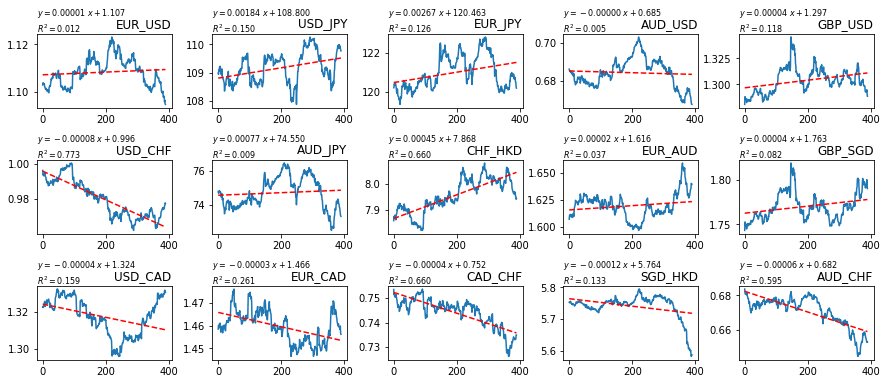

In [11]:
# Graficas

x = np.arange(len(closes))
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(closes.columns))

m = np.arange(len(closes.columns), dtype='float64')
b = np.arange(len(closes.columns), dtype='float64')


for ax, d in zip(axs.ravel(), data):
    ax.plot(x, closes.iloc[:,d])
    m[d], b[d] = Regresion_L(x, closes.iloc[:,d])
    ax.set_title(instrument[d], loc = 'right')

Las divisas que mejor se ajustan a una tendencia lineal son USD-CAD, CAD-CHF, AUD-USD y EUR-USD

# Rendimientos

In [12]:
# Rendimientos
def Returns(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [13]:
rend = [Returns(closes.iloc[:,i]) for i in range(len(closes.columns))]
rend = pd.concat(rend, axis = 1)

In [14]:
resume_rend = rend.describe()
resume_rend

,EUR_USD,USD_JPY,EUR_JPY,AUD_USD,GBP_USD,USD_CHF,AUD_JPY,CHF_HKD,EUR_AUD,GBP_SGD,USD_CAD,EUR_CAD,CAD_CHF,SGD_HKD,AUD_CHF
count,389.000000,389.000000,3.890000e+02,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,-0.000019,0.000019,-3.850106e-07,-0.000070,0.000016,-0.000049,-0.000051,0.000028,0.000051,0.000069,0.000015,-0.000004,-0.000064,-0.000075,-0.000119
std,0.001000,0.001102,1.282810e-03,0.001445,0.002087,0.001184,0.001950,0.001195,0.001295,0.001982,0.001034,0.001156,0.001404,0.000746,0.001642
min,-0.003923,-0.006376,-6.082834e-03,-0.005835,-0.007095,-0.005388,-0.007946,-0.003333,-0.004969,-0.007006,-0.004629,-0.005141,-0.007235,-0.006548,-0.005337
25%,-0.000433,-0.000475,-5.963326e-04,-0.000937,-0.000755,-0.000657,-0.001177,-0.000668,-0.000726,-0.000761,-0.000496,-0.000524,-0.000810,-0.000349,-0.001042
50%,-0.000018,0.000000,1.663548e-05,0.000044,0.000015,0.000041,0.000132,-0.000035,-0.000019,0.000051,0.000023,0.000027,0.000013,-0.000028,-0.000089
75%,0.000446,0.000627,7.054443e-04,0.000806,0.000836,0.000602,0.001061,0.000667,0.000804,0.000907,0.000461,0.000579,0.000628,0.000342,0.000769
max,0.005141,0.004738,5.457196e-03,0.004909,0.021438,0.003393,0.006234,0.005355,0.004400,0.019655,0.006109,0.006221,0.005490,0.002181,0.005590


In [15]:
cor = rend.corr()
cor.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,EUR_USD,USD_JPY,EUR_JPY,AUD_USD,GBP_USD,USD_CHF,AUD_JPY,CHF_HKD,EUR_AUD,GBP_SGD,USD_CAD,EUR_CAD,CAD_CHF,SGD_HKD,AUD_CHF
EUR_USD,1,-0.26,0.56,0.49,0.46,-0.68,0.21,0.65,0.23,0.34,-0.36,0.55,-0.31,0.35,-0.061
USD_JPY,-0.26,1,0.66,0.16,-0.0024,0.52,0.68,-0.5,-0.37,-0.047,-0.026,-0.24,0.46,0.15,0.51
EUR_JPY,0.56,0.66,1,0.52,0.36,-0.082,0.75,0.083,-0.14,0.23,-0.3,0.22,0.15,0.4,0.4
AUD_USD,0.49,0.16,0.52,1,0.26,-0.23,0.83,0.22,-0.74,0.099,-0.41,0.051,0.11,0.46,0.71
GBP_USD,0.46,-0.0024,0.36,0.26,1,-0.24,0.2,0.25,0.061,0.94,-0.27,0.15,-0.002,0.32,0.059
USD_CHF,-0.68,0.52,-0.082,-0.23,-0.24,1,0.12,-0.98,-0.26,-0.19,0.2,-0.4,0.69,-0.14,0.52
AUD_JPY,0.21,0.68,0.75,0.83,0.2,0.12,1,-0.12,-0.76,0.049,-0.32,-0.1,0.34,0.42,0.82
CHF_HKD,0.65,-0.5,0.083,0.22,0.25,-0.98,-0.12,1,0.26,0.2,-0.2,0.38,-0.67,0.22,-0.51
EUR_AUD,0.23,-0.37,-0.14,-0.74,0.061,-0.26,-0.76,0.26,1,0.15,0.19,0.37,-0.36,-0.24,-0.84
GBP_SGD,0.34,-0.047,0.23,0.099,0.94,-0.19,0.049,0.2,0.15,1,-0.17,0.15,-0.04,0.0002,-0.05


## Histogramas

In [16]:
def Normal(y):
    x = np.linspace(min(y),max(y), len(y))
    param = st.norm.fit(y)
    pdf_fitted = st.norm.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    
    #Graficas
    ax.plot(x,pdf_fitted)


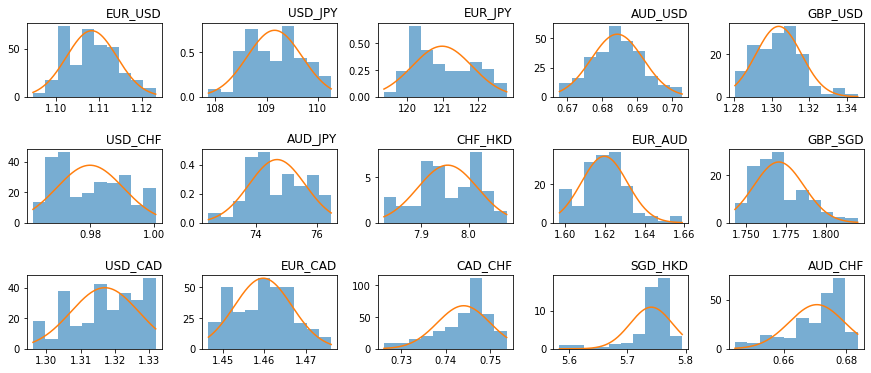

In [17]:
# Graficas
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(rend.columns))

for ax, d in zip(axs.ravel(), data):
    ax.hist(closes.iloc[:,d], bins = 10, density = True, alpha = 0.6)
    Normal(closes.iloc[:,d])
    ax.set_title(instrument[d], loc = 'right')

In [18]:
def Normal_Test(y, name):
    s,p = st.mstats.normaltest(y)
    print("p value for " + name + " = "+str(p))
    return p
normp_clo = [Normal_Test(closes.iloc[:,i], instrument[i]) for i in range(len(rend.columns))]

p value for EUR_USD = 0.0009571232534429543
p value for USD_JPY = 1.5348347233112721e-09
p value for EUR_JPY = 5.726329342282619e-26
p value for AUD_USD = 0.3457072040294776
p value for GBP_USD = 2.251971009850387e-05
p value for USD_CHF = 1.708317802657048e-52
p value for AUD_JPY = 6.366044884036521e-08
p value for CHF_HKD = 7.779240996518189e-11
p value for EUR_AUD = 4.504623359450387e-06
p value for GBP_SGD = 2.239624955739072e-07
p value for USD_CAD = 6.588995824924104e-19
p value for EUR_CAD = 2.1033803919544614e-08
p value for CAD_CHF = 2.4985677361061896e-12
p value for SGD_HKD = 7.971477446343458e-47
p value for AUD_CHF = 8.474262110064141e-14


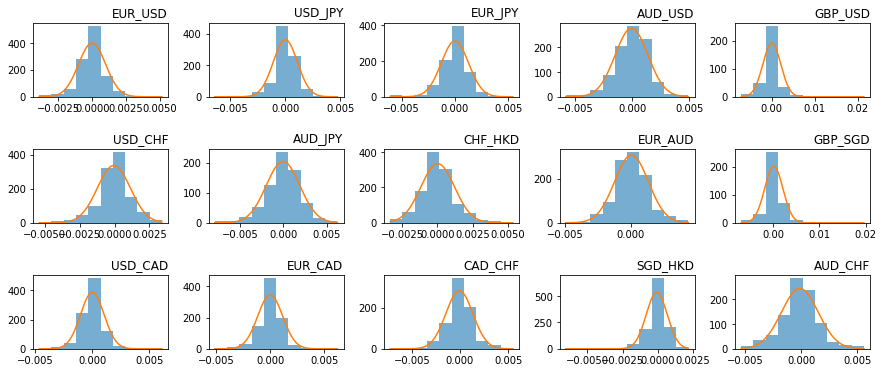

In [19]:
# Graficas
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(rend.columns))

for ax, d in zip(axs.ravel(), data):
    ax.hist(rend.iloc[:,d], bins = 10, density = True, alpha = 0.6)
    Normal(rend.iloc[:,d])
    ax.set_title(instrument[d], loc = 'right')

In [20]:
normp_rend = [Normal_Test(rend.iloc[:,i], instrument[i]) for i in range(len(rend.columns))]

p value for EUR_USD = 4.521303433885124e-11
p value for USD_JPY = 1.2806451819024126e-17
p value for EUR_JPY = 3.5170595700315226e-15
p value for AUD_USD = 1.4847963245304707e-05
p value for GBP_USD = 9.622765588231924e-64
p value for USD_CHF = 1.9149769399464427e-10
p value for AUD_JPY = 1.3685785949985371e-07
p value for CHF_HKD = 4.087662912416798e-08
p value for EUR_AUD = 0.008145089937822552
p value for GBP_SGD = 1.0762012691033678e-58
p value for USD_CAD = 4.1737215399094865e-23
p value for EUR_CAD = 1.5749746721016758e-12
p value for CAD_CHF = 6.760126511015274e-09
p value for SGD_HKD = 5.119080807379695e-48
p value for AUD_CHF = 0.010353328941760534


In [21]:
# Definimos la tabla donde se mostrarán los resultados

df = pd.DataFrame(index=instrument, columns = ['Media_P', 'DesvEst_P', 'Pendiente', 'Intercepto', 
                                               'Normal_test_P', 'Media_R', 'DesvEst_R', 'Normal_test_R'], dtype='float')


# Mostramos los resultados en la tabla previamente creada

df['Media_P'] = (resume_clos.loc['mean'])
df['DesvEst_P'] = resume_clos.loc['std']

df['Pendiente'] = m
df['Intercepto'] = b

df['Normal_test_P'] = normp_clo

df['Media_R'] = resume_rend.loc['mean']
df['DesvEst_R'] = resume_rend.loc['std']

df['Normal_test_R'] = normp_rend

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df)

,Media_P,DesvEst_P,Pendiente,Intercepto,Normal_test_P,Media_R,DesvEst_R,Normal_test_R
EUR_USD,1.108296,0.005828,0.000006,1.107186,9.571233e-04,-1.913723e-05,0.001000,4.521303e-11
USD_JPY,109.157741,0.535740,0.001842,108.799547,1.534835e-09,1.856801e-05,0.001102,1.280645e-17
EUR_JPY,120.981251,0.847278,0.002666,120.462670,5.726329e-26,-3.850106e-07,0.001283,3.517060e-15
AUD_USD,0.684317,0.007454,-0.000005,0.685195,3.457072e-01,-6.995363e-05,0.001445,1.484796e-05
GBP_USD,1.303752,0.012095,0.000037,1.296577,2.251971e-05,1.575024e-05,0.002087,9.622766e-64
USD_CHF,0.979954,0.010560,-0.000082,0.995978,1.708318e-52,-4.922956e-05,0.001184,1.914977e-10
AUD_JPY,74.698941,0.915210,0.000766,74.550022,6.366045e-08,-5.135413e-05,0.001950,1.368579e-07
CHF_HKD,7.956131,0.063057,0.000454,7.867752,7.779241e-11,2.752911e-05,0.001195,4.087663e-08
EUR_AUD,1.619680,0.011635,0.000020,1.615843,4.504623e-06,5.081743e-05,0.001295,8.145090e-03
GBP_SGD,1.770429,0.015639,0.000040,1.762697,2.239625e-07,6.880697e-05,0.001982,1.076201e-58


# Sharpe

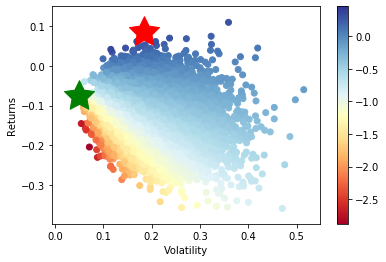

In [24]:

data = rend*30*252
num = 10000


def Sharpe(data, num):
    n = len(data.columns)
    mean = data.mean()
    cov_matrix = data.cov()
    results = np.zeros((num, 3+n))
    for i in range(num):
        w = np.array(np.random.random(n))
        w /= np.sum(w)
        results[i, 3:] = np.round(w, 3)*100
        results[i, 0] = np.sum(mean * w) 
        results[i, 1] = np.dot(np.dot(w.T, cov_matrix), w)/100
        results[i, 2] = results[i,0] / results[i,1]
    return results

results = Sharpe(data, num)
results_frame = pd.DataFrame(results, columns=['ret','stdev','sharpe'] + instrument)
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [23]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(max_sharpe_port)

ret         0.087220
stdev       0.101557
sharpe      0.858833
EUR_USD     5.700000
USD_JPY    17.500000
EUR_JPY     3.500000
AUD_USD     0.100000
GBP_USD     4.600000
USD_CHF     6.000000
AUD_JPY     8.400000
CHF_HKD    17.900000
EUR_AUD    19.200000
GBP_SGD     3.200000
USD_CAD     9.800000
EUR_CAD     1.400000
CAD_CHF     0.500000
SGD_HKD     1.500000
AUD_CHF     0.700000
Name: 1019, dtype: float64


<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> EUR-AUD, CHF-HKD, USD-JPY, GBP-USD, AUD-JPY</p>



In [33]:
ins = ['USD_JPY', 'GBP_USD', 'AUD_JPY', 'CHF_HKD', 'EUR_AUD']
new_c = [closes[i] for i in ins ]
new_c = pd.concat(new_c, axis = 1)

new_r = [Returns(new_c.iloc[:,i]) for i in range(len(new_c.columns))]
new_r = pd.concat(new_r, axis = 1)

new_r

,USD_JPY,GBP_USD,AUD_JPY,CHF_HKD,EUR_AUD
1,-0.000376,0.005793,-0.001526,0.002058,0.001995
2,0.001358,-0.001663,0.000669,-0.000455,0.000552
3,-0.000312,-0.000389,0.000054,0.000674,-0.000757
4,0.001146,0.000506,0.001444,0.000376,-0.000149
...,...,...,...,...,...
386,0.000209,-0.000912,-0.002550,-0.001297,0.000679
387,-0.000619,0.001608,-0.002624,-0.000088,0.002607
388,-0.000601,-0.003149,-0.001581,-0.001436,-0.000415
389,-0.000355,-0.001675,-0.000477,0.000331,-0.000091


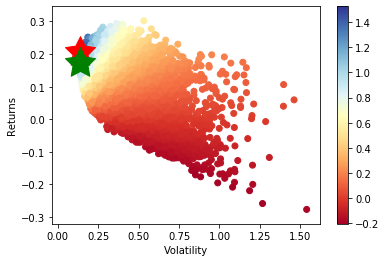

In [38]:
data = new_r*30*252
results = Sharpe(data, num)
results_frame = pd.DataFrame(results, columns=['ret','stdev','sharpe'] + ins)
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [39]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(max_sharpe_port)

ret         0.206801
stdev       0.135572
sharpe      1.525404
USD_JPY    41.600000
GBP_USD     0.700000
AUD_JPY     3.100000
CHF_HKD    28.800000
EUR_AUD    25.900000
Name: 5856, dtype: float64
